# Assignment 1: Using Python

## Exercise 1: Forecasting

In [1]:
import matplotlib.pyplot as plt

In [2]:
def forecast(initial_forecast = 100, alpha = 0.5):
  demand = [80, 95, 75, 60, 120, 100]
  # Initialize forecast
  demand_observations = len(demand)
  forecast = [0 for i in range(demand_observations)]
  forecast[0] = initial_forecast
  # For each observation, calculate forecast
  for observation in range(demand_observations-1):
      forecast[observation+1] = alpha*demand[observation]\
                                +(1-alpha)*forecast[observation]


  # Output forecast
  print(forecast)

  # Output plots
  # https://github.com/rougier/matplotlib-tutorial
  time = [i for i in range(1,demand_observations+1)]
  plt.plot(time,forecast,'g^')
  plt.plot(time,demand,'bs')
  plt.xlabel("Time")
  plt.ylabel("Forecast")
  plt.show()

[100, 94.0, 94.3, 88.50999999999999, 79.957, 91.9699]


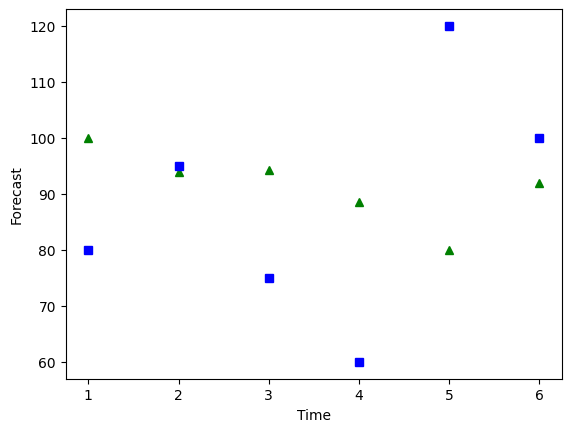

In [3]:
forecast(initial_forecast = 100, alpha = 0.3)

[100, 80, 95, 75, 60, 120]


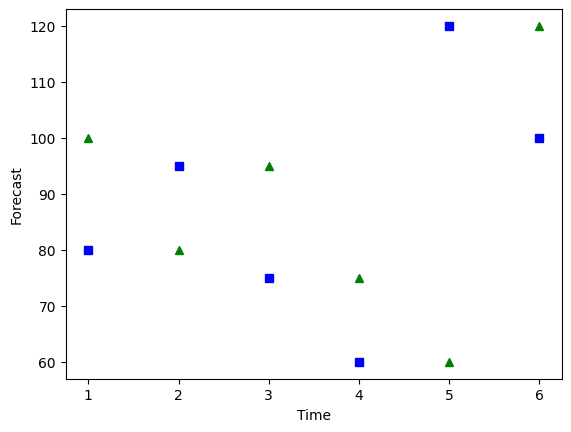

In [4]:
forecast(initial_forecast = 100, alpha = 1)

## Exercise 2: EOQ

In [5]:
import math

In [6]:
def eoq(capacity = 500, usages = [1, 2, 1]):
  # Input data
  setup_costs = [500, 1000, 700]
  holding_costs = [3, 5, 10]
  demands = [50, 200, 125]

  num_products = len(setup_costs)
  # Calculate EOQ without lagrange multiplier
  used_capacity = 0
  for product in range(num_products):
      eoq = math.sqrt(2*demands[product]*setup_costs[product]
                      / holding_costs[product])
      used_capacity += usages[product]*eoq
      print("EOQ for product "+str(product)+": "+str(eoq))

  print("Used capacity: "+str(used_capacity))

  # Check if capacity is sufficient for optimal EOQ
  if used_capacity > capacity:
      capacity_satisfied = False
  else:
      capacity_satisfied = True

  # Calculate EOQ with lagrange multiplier
  if capacity_satisfied:
      print("Capacity is sufficient for optimal EOQ")
  else:
      print("Capacity is not sufficient for optimal EOQ")

      print("Calculating EOQ with lagrange multiplier")
      lb = 0
      ub = 200

      while (ub-lb > 0.01):
          lagrange_multiplier = 0.5*(lb+ub)
          used_capacity = 0
          for product in range(num_products):
              eoq = math.sqrt(2*demands[product]*setup_costs[product]
                              / (holding_costs[product]+2*usages[product]
                                * lagrange_multiplier))
              used_capacity += usages[product]*eoq

          if used_capacity > capacity:
              lb = lagrange_multiplier
          else:
              ub = lagrange_multiplier

      print("Lagrange multiplier: "+str(lagrange_multiplier))
      for product in range(num_products):
          eoq = math.sqrt(2*demands[product]*setup_costs[product]
                          / (holding_costs[product]+2*usages[product]
                            * lagrange_multiplier))
          print("EOQ for product "+str(product)+": "+str(eoq))

In [7]:
eoq(capacity = 500, usages = [1, 2, 1])

EOQ for product 0: 129.09944487358058
EOQ for product 1: 282.842712474619
EOQ for product 2: 132.28756555322954
Used capacity: 827.0724353760481
Capacity is not sufficient for optimal EOQ
Calculating EOQ with lagrange multiplier
Lagrange multiplier: 2.740478515625
EOQ for product 0: 76.78255698435468
EOQ for product 1: 158.3024044969039
EOQ for product 2: 106.32126171335544


In [8]:
eoq(capacity = 900, usages = [1, 2, 1])

EOQ for product 0: 129.09944487358058
EOQ for product 1: 282.842712474619
EOQ for product 2: 132.28756555322954
Used capacity: 827.0724353760481
Capacity is sufficient for optimal EOQ


## Exercise 3: Transportation Problem

In [9]:
import numpy as np
from graphviz import Digraph
import copy

**Problem 3a**

In [10]:
def transportation_col_min(capacities, demands, costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  for sink in range(num_sinks):
      sources = list(range(num_sources))
      sources = sorted(sources, key=lambda x: costs[x][sink])
      print("Ordered sources:", sources)
      for source in sources:
          # If there is a remaining capacity and demand
          if (capacities[source] > 0 and demands[sink] > 0):  
              trans_quantities[source,sink] = min(capacities[source],demands[sink])
              # Update the remaining capacity and demand
              capacities[source] = capacities[source]-trans_quantities[source,sink]
              demands[sink] = demands[sink]-trans_quantities[source,sink]
  
  return trans_quantities

**Problem 3b**

In [11]:
def transportation_mat_min(capacities, demands, costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  pairs = [(source, sink) for source in range(num_sources) for sink in range(num_sinks)]
  pairs = sorted(pairs, key=lambda x: costs[x[0]][x[1]])
  print("Ordered pairs:", pairs)

  for source, sink in pairs:
      # If there is a remaining capacity and demand
      if (capacities[source] > 0 and demands[sink] > 0):  
          trans_quantities[source,sink] = min(capacities[source],demands[sink])
          # Update the remaining capacity and demand
          capacities[source] = capacities[source]-trans_quantities[source,sink]
          demands[sink] = demands[sink]-trans_quantities[source,sink]
  
  return trans_quantities

In [12]:
def transportation(capacities, demands, costs, method = 'column-minimum'):
  capacities = copy.deepcopy(capacities)
  demands = copy.deepcopy(demands)

  if method == 'column-minimum':
    trans_quantities = transportation_col_min(capacities, demands, costs)
  elif method == 'matrix-minimum':
    trans_quantities = transportation_mat_min(capacities, demands, costs)
  else:
    print('Invalid method name')
    return
  
  total_cost = np.sum(costs*trans_quantities)
  print("Transport quantities: ")
  print(trans_quantities)
  print("Total costs: "+str(total_cost))

  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers

  # Plot the transportation network
  file = Digraph(comment='TPP')
  for source in range(num_sources):
      file.node('C'+str(source+1))
  for sink in range(num_sinks):
      file.node('D'+str(sink+1))

  for source in range(num_sources):
      for sink in range(num_sinks):
          if trans_quantities[source,sink]>0:
              file.edge('C'+str(source+1),'D'+str(sink+1),
                        label=str(trans_quantities[source,sink]))

  file.view()

In [13]:
capacities = [5,8,7]
demands = [3,6,6,5]
costs = [[4,5,2,7],[5,8,6,2],[8,9,4,3]]

In [14]:
transportation(capacities, demands, costs, method = 'column-minimum')

Ordered sources: [0, 1, 2]
Ordered sources: [0, 1, 2]
Ordered sources: [0, 2, 1]
Ordered sources: [1, 2, 0]
Transport quantities: 
[[3. 2. 0. 0.]
 [0. 4. 0. 4.]
 [0. 0. 6. 1.]]
Total costs: 89.0


In [15]:
transportation(capacities, demands, costs, method = 'matrix-minimum')

Ordered pairs: [(0, 2), (1, 3), (2, 3), (0, 0), (2, 2), (0, 1), (1, 0), (1, 2), (0, 3), (1, 1), (2, 0), (2, 1)]
Transport quantities: 
[[0. 0. 5. 0.]
 [3. 0. 0. 5.]
 [0. 6. 1. 0.]]
Total costs: 93.0


## Exercise 4: TSP

In [16]:
distances = [[100, 3, 5, 2, 6, 4],
            [2, 100, 7, 5, 1, 3], 
            [2, 4, 100, 3, 2, 6], 
            [5, 3, 6, 100, 4, 4], 
            [1, 4, 5, 2, 100, 6], 
            [6, 5, 7, 3, 3, 100]]

**Problem 4a**

In [17]:
def tsp_successive_insertion(distances):
  n = len(distances)
  # Initialize tour and length
  tour = [0, 0]
  tour_length = distances[0][0]

  for node in range(1, n):
      tour_indices = list(range(node))
      # Find the best place to insert the new node into the tour
      best_idx = min(tour_indices, key=lambda x: distances[tour[x]][node] + distances[node][tour[x+1]] - distances[tour[x]][tour[x+1]])
      # Update the length of the tour
      tour_length += distances[tour[best_idx]][node] + distances[node][tour[best_idx+1]] - distances[tour[best_idx]][tour[best_idx+1]]
      # Add the new node to the tour
      tour.insert(best_idx+1, node)
      print("Adding node ", node)
      print("Tour: ", tour)
      print("Length of the tour: ", tour_length)

  print()
  print("Final tour: ", tour)
  print("Length of the final tour: ", tour_length)

In [18]:
tsp_successive_insertion(distances)

Adding node  1
Tour:  [0, 1, 0]
Length of the tour:  5
Adding node  2
Tour:  [0, 2, 1, 0]
Length of the tour:  11
Adding node  3
Tour:  [0, 2, 3, 1, 0]
Length of the tour:  13
Adding node  4
Tour:  [0, 2, 3, 1, 4, 0]
Length of the tour:  13
Adding node  5
Tour:  [0, 2, 3, 1, 5, 4, 0]
Length of the tour:  18

Final tour:  [0, 2, 3, 1, 5, 4, 0]
Length of the final tour:  18


**Problem 4b**

In [19]:
def tsp_nn(distances):
  # Start at node 0
  node = 0
  # Initialize tour and length
  tour = [node]
  tour_length = 0
  unvisited_customers = list(range(len(distances)))
  unvisited_customers.remove(node)

  while unvisited_customers:
      # Find the nearest neighbor from unvisited customers
      nearest_neighbor = min(unvisited_customers, key=lambda x: distances[node][x])
      # Add the nearest neighbor to the tour
      tour.append(nearest_neighbor)
      # Update the length of the tour
      tour_length += distances[node][nearest_neighbor]
      # Update the node
      node = nearest_neighbor
      # Remove the nearest neighbor from the unvisited customers
      unvisited_customers.remove(node)

  final_node = tour[-1]
  tour.append(0)  # Return to the start
  tour_length += distances[final_node][0]
  print("Result of nearest neighbor heuristic")
  print("Tour: ", tour)
  print("Length of the tour: ", tour_length)
  return tour, tour_length

In [20]:
def tsp_nn_2opt(distances):
  n = len(distances)
  tour, tour_length = tsp_nn(distances)
  improve = True
  while improve:
      improve = False
      best_tour = None
      best_node_combination = None
      best_cost_change = 0
      for tour_idx_1 in range(n):
          for tour_idx_2 in range(tour_idx_1+2, n):
              u1 = tour[tour_idx_1]
              v1 = tour[tour_idx_1+1]
              u2 = tour[tour_idx_2]
              v2 = tour[tour_idx_2+1]
              # Swap v1 and u2
              subtour = tour[tour_idx_1+1:tour_idx_2+1]
              subtour.reverse()
              # Order of the nodes between v1 and u2 also change
              # Therefore, take the reverse of the subtour and add into new tour
              new_tour = tour[:tour_idx_1+1] + subtour + tour[tour_idx_2+1:]
              cost_change = 0
              for idx in range(tour_idx_1, tour_idx_2+1):
                  cost_change -= distances[tour[idx]][tour[idx+1]]
                  cost_change += distances[new_tour[idx]][new_tour[idx+1]]
              if cost_change < best_cost_change:
                  best_tour = new_tour
                  best_cost_change = cost_change
                  best_node_combination = (u1, v1, u2, v2)
      if best_cost_change < 0:
          improve = True
          tour = best_tour
          tour_length += best_cost_change
          u1, v1, u2, v2 = best_node_combination
          print(f"Changing {u1}-{v1} and {u2}-{v2} to {u1}-{u2} and {v1}-{v2}")
          print("Tour: ", tour)
          print("Length of the tour: ", tour_length)
  print("After 2 OPT")
  print("Tour: ", tour)
  print("Length of the tour: ", tour_length)

In [21]:
tsp_nn_2opt(distances)

Result of nearest neighbor heuristic
Tour:  [0, 3, 1, 4, 2, 5, 0]
Length of the tour:  23
Changing 1-4 and 5-0 to 1-5 and 4-0
Tour:  [0, 3, 1, 5, 2, 4, 0]
Length of the tour:  18
After 2 OPT
Tour:  [0, 3, 1, 5, 2, 4, 0]
Length of the tour:  18


## Exercise 5: Transportation and Warehouse Location Problem

In [22]:
import numpy as np
from graphviz import Digraph

**Problem 5a (capacitated)**

In [23]:
def transportation_fixed_investment_capacitated_simple(capacities, demands, costs, fixed_costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  for source in range(num_sources):
      for sink in range(num_sinks):
          # If there is a remaining capacity and demand
          if (capacities[source] > 0 and demands[sink] > 0):  
              trans_quantities[source,sink] = min(capacities[source],demands[sink])
              # Update the remaining capacity and demand
              capacities[source] = capacities[source]-trans_quantities[source,sink]
              demands[sink] = demands[sink]-trans_quantities[source,sink]
            
  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*(trans_quantities > 0))

  print("Transport quantities: ")
  print(trans_quantities)
  print("Total costs: "+str(total_cost))

In [24]:
def transportation_fixed_investment_capacitated_col_min(capacities, demands, costs, fixed_costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  for sink in range(num_sinks):
      sources = list(range(num_sources))
      sources = sorted(sources, key=lambda x: costs[x][sink])
      print("Ordered sources:", sources)
      for source in sources:
          # If there is a remaining capacity and demand
          if (capacities[source] > 0 and demands[sink] > 0):  
              trans_quantities[source,sink] = min(capacities[source],demands[sink])
              # Update the remaining capacity and demand
              capacities[source] = capacities[source]-trans_quantities[source,sink]
              demands[sink] = demands[sink]-trans_quantities[source,sink]
            
  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*(trans_quantities > 0))

  print("Transport quantities: ")
  print(trans_quantities)
  print("Total costs: "+str(total_cost))

In [25]:
def transportation_fixed_investment_capacitated_mat_min(capacities, demands, costs, fixed_costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  pairs = [(source, sink) for source in range(num_sources) for sink in range(num_sinks)]
  pairs = sorted(pairs, key=lambda x: costs[x[0]][x[1]])
  print("Ordered pairs:", pairs)

  for source, sink in pairs:
      # If there is a remaining capacity and demand
      if (capacities[source] > 0 and demands[sink] > 0):  
          trans_quantities[source,sink] = min(capacities[source],demands[sink])
          # Update the remaining capacity and demand
          capacities[source] = capacities[source]-trans_quantities[source,sink]
          demands[sink] = demands[sink]-trans_quantities[source,sink]
            
  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*(trans_quantities > 0))

  print("Transport quantities: ")
  print(trans_quantities)
  print("Total costs: "+str(total_cost))

In [26]:
def transportation_fixed_investment_capacitated(capacities, demands, costs, fixed_costs, method = 'simple'):
  capacities = copy.deepcopy(capacities)
  demands = copy.deepcopy(demands)
  if method == 'simple':
    transportation_fixed_investment_capacitated_simple(capacities, demands, costs, fixed_costs)
  elif method == 'column-minimum':
    transportation_fixed_investment_capacitated_col_min(capacities, demands, costs, fixed_costs)
  elif method == 'matrix-minimum':
    transportation_fixed_investment_capacitated_mat_min(capacities, demands, costs, fixed_costs)
  else:
    print('Invalid method name')
    return

In [27]:
capacities = [5,8,7]
demands = [3,6,6,5]
costs = [[4,5,2,7],[5,8,6,2],[8,9,4,3]]
fixed_costs = [[2,10,1,5],[7,2,7,8],[4,0,3,9]]

In [28]:
transportation_fixed_investment_capacitated(capacities, demands, costs, fixed_costs, 'simple')

Transport quantities: 
[[3. 2. 0. 0.]
 [0. 4. 4. 0.]
 [0. 0. 2. 5.]]
Total costs: 134.0


In [29]:
transportation_fixed_investment_capacitated(capacities, demands, costs, fixed_costs, 'column-minimum')

Ordered sources: [0, 1, 2]
Ordered sources: [0, 1, 2]
Ordered sources: [0, 2, 1]
Ordered sources: [1, 2, 0]
Transport quantities: 
[[3. 2. 0. 0.]
 [0. 4. 0. 4.]
 [0. 0. 6. 1.]]
Total costs: 123.0


In [30]:
transportation_fixed_investment_capacitated(capacities, demands, costs, fixed_costs, 'matrix-minimum')

Ordered pairs: [(0, 2), (1, 3), (2, 3), (0, 0), (2, 2), (0, 1), (1, 0), (1, 2), (0, 3), (1, 1), (2, 0), (2, 1)]
Transport quantities: 
[[0. 0. 5. 0.]
 [3. 0. 0. 5.]
 [0. 6. 1. 0.]]
Total costs: 112.0


**Problem 5a (uncapacitated)**

In [31]:
def transportation_fixed_investment_uncapacitated_simple(demands, costs, fixed_costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  for source in range(num_sources):
      for sink in range(num_sinks):
          # If there is a remaining capacity and demand
          if demands[sink] > 0:  
              trans_quantities[source,sink] = demands[sink]
              # Update the remaining demand
              demands[sink] = 0
            
  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*(trans_quantities > 0))

  print("Transport quantities: ")
  print(trans_quantities)
  print("Total costs: "+str(total_cost))

In [32]:
def transportation_fixed_investment_uncapacitated_col_min(demands, costs, fixed_costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  for sink in range(num_sinks):
      sources = list(range(num_sources))
      source = min(sources, key=lambda x: costs[x][sink])
      trans_quantities[source,sink] = demands[sink]
            
  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*(trans_quantities > 0))

  print("Transport quantities: ")
  print(trans_quantities)
  print("Total costs: "+str(total_cost))

In [33]:
def transportation_fixed_investment_uncapacitated_mat_min(demands, costs, fixed_costs):
  num_sources = len(capacities)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))

  pairs = [(source, sink) for source in range(num_sources) for sink in range(num_sinks)]
  pairs = sorted(pairs, key=lambda x: costs[x[0]][x[1]])
  print("Ordered pairs:", pairs)

  for source, sink in pairs:
      # If there is a remaining demand
      if demands[sink] > 0:
          trans_quantities[source,sink] = demands[sink]
          # Update the remaining demand
          demands[sink] = 0

  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*(trans_quantities > 0))

  print("Transport quantities: ")
  print(trans_quantities)
  print("Total costs: "+str(total_cost))

In [34]:
def transportation_fixed_investment_uncapacitated(demands, costs, fixed_costs, method = 'simple'):
  demands = copy.deepcopy(demands)
  if method == 'simple':
    transportation_fixed_investment_uncapacitated_simple(demands, costs, fixed_costs)
  elif method == 'column-minimum':
    transportation_fixed_investment_uncapacitated_col_min(demands, costs, fixed_costs)
  elif method == 'matrix-minimum':
    transportation_fixed_investment_uncapacitated_mat_min(demands, costs, fixed_costs)
  else:
    print('Invalid method name')
    return

In [35]:
transportation_fixed_investment_uncapacitated(demands, costs, fixed_costs, 'simple')

Transport quantities: 
[[3. 6. 6. 5.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Total costs: 107.0


In [36]:
transportation_fixed_investment_uncapacitated(demands, costs, fixed_costs, 'column-minimum')

Transport quantities: 
[[3. 6. 6. 0.]
 [0. 0. 0. 5.]
 [0. 0. 0. 0.]]
Total costs: 85.0


In [37]:
transportation_fixed_investment_uncapacitated(demands, costs, fixed_costs, 'matrix-minimum')

Ordered pairs: [(0, 2), (1, 3), (2, 3), (0, 0), (2, 2), (0, 1), (1, 0), (1, 2), (0, 3), (1, 1), (2, 0), (2, 1)]
Transport quantities: 
[[3. 6. 6. 0.]
 [0. 0. 0. 5.]
 [0. 0. 0. 0.]]
Total costs: 85.0


**Considering the comments on Moodle, I assume that there is no restriction on capacities of facilities for the following problems 5b and 5c.**

**Problem 5b**

In [38]:
def warehouse_location_extended(demands, costs, fixed_costs):
  num_sources = len(fixed_costs)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))
  source_used = [0 for _ in range(num_sources)]

  all_sources_used = set()
  for sink in range(num_sinks):
      sources = list(range(num_sources))
      source = min(sources, key=lambda x: costs[x][sink])
      trans_quantities[source,sink] = demands[sink]
      # Update the remaining capacity and demand
      source_used[source] = 1
      all_sources_used.add(source)
          
  source_used = np.array(source_used)
  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*source_used)

  print("Transport quantities: ")
  print(trans_quantities)
  print("All used sources: ", all_sources_used)
  print("Total costs: "+str(total_cost))

  # Plot the transportation network
  file = Digraph(comment='TPP')
  for source in range(num_sources):
      file.node('C'+str(source+1))
  for sink in range(num_sinks):
      file.node('D'+str(sink+1))

  for source in range(num_sources):
      for sink in range(num_sinks):
          if trans_quantities[source,sink]>0:
              file.edge('C'+str(source+1),'D'+str(sink+1),
                        label=str(trans_quantities[source,sink]))

  file.view()

In [39]:
costs = [[1,2,10,9,6,7,3],[2,9,0,7,3,6,10],[7,6,1,5,3,10,5],[6,5,10,2,6,3,6],[6,4,6,3,7,2,6]]
fixed_costs = [5,7,5,6,5]

In [40]:
demands = [3,6,6,5,1,2,5]

In [41]:
warehouse_location_extended(demands, costs, fixed_costs)

Transport quantities: 
[[3. 6. 0. 0. 0. 0. 5.]
 [0. 0. 6. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]]
All used sources:  {0, 1, 3, 4}
Total costs: 70.0


**Problem 5c**

In [42]:
def get_trans_quantities_with_sources(demands, costs, fixed_costs, allowed_sources):
  num_sources = len(fixed_costs)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities = np.zeros((num_sources,num_sinks))
  source_used = [0 for _ in range(num_sources)]

  for sink in range(num_sinks):
      sources = copy.deepcopy(allowed_sources)
      source = min(sources, key=lambda x: costs[x][sink])
      trans_quantities[source,sink] = demands[sink]
      # Update the remaining capacity and demand
      source_used[source] = 1
  
  source_used = np.array(source_used)
  total_cost = np.sum(costs*trans_quantities) + np.sum(fixed_costs*source_used)
  sources = [source for source in allowed_sources if source_used[source] == 1]
  return trans_quantities, total_cost, sources


def warehouse_location_heuristics(demands, costs, fixed_costs, initial_source):
  num_sources = len(fixed_costs)
  num_sinks = len(demands)  # Or number of customers
  trans_quantities, total_cost, sources = get_trans_quantities_with_sources(demands, costs, fixed_costs, [initial_source])

  improve = True
  while improve:
      improve = False
      best_total_cost = total_cost
      best_trans_quantities = None
      best_sources = None
      for source in range(num_sources):
          if source not in sources:
              allowed_sources = copy.deepcopy(sources)
              allowed_sources.append(source)
              trial_trans_quantities, trial_total_cost, trial_sources = get_trans_quantities_with_sources(demands, costs, fixed_costs, allowed_sources)
              if trial_total_cost < best_total_cost:
                  improve = True
                  best_total_cost = trial_total_cost
                  best_trans_quantities = trial_trans_quantities
                  best_sources = trial_sources
      if improve:
          total_cost = best_total_cost
          trans_quantities = best_trans_quantities
          sources = best_sources

  print("Transport quantities: ")
  print(trans_quantities)
  print("All used sources: ", sources)
  print("Total costs: "+str(total_cost))

  # Plot the transportation network
  file = Digraph(comment='TPP')
  for source in range(num_sources):
      file.node('C'+str(source+1))
  for sink in range(num_sinks):
      file.node('D'+str(sink+1))

  for source in range(num_sources):
      for sink in range(num_sinks):
          if trans_quantities[source,sink]>0:
              file.edge('C'+str(source+1),'D'+str(sink+1),
                        label=str(trans_quantities[source,sink]))

  file.view()

In [43]:
warehouse_location_heuristics(demands, costs, fixed_costs, 0)

Transport quantities: 
[[3. 6. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 6. 0. 1. 0. 0.]
 [0. 0. 0. 5. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
All used sources:  [0, 2, 3]
Total costs: 71.0


In [44]:
warehouse_location_heuristics(demands, costs, fixed_costs, 1)

Transport quantities: 
[[3. 6. 0. 0. 0. 0. 5.]
 [0. 0. 6. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
All used sources:  [1, 0, 3]
Total costs: 67.0


In [45]:
warehouse_location_heuristics(demands, costs, fixed_costs, 2)

Transport quantities: 
[[3. 6. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 6. 0. 1. 0. 0.]
 [0. 0. 0. 5. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
All used sources:  [2, 0, 3]
Total costs: 71.0


In [46]:
warehouse_location_heuristics(demands, costs, fixed_costs, 3)

Transport quantities: 
[[3. 6. 0. 0. 0. 0. 5.]
 [0. 0. 6. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
All used sources:  [3, 1, 0]
Total costs: 67.0


In [47]:
warehouse_location_heuristics(demands, costs, fixed_costs, 4)

Transport quantities: 
[[3. 6. 0. 0. 0. 0. 5.]
 [0. 0. 6. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 2. 0.]]
All used sources:  [4, 1, 0]
Total costs: 69.0


It seems that performance of the heuristics depends on the initial source we set. For some sources like warehouse0 and warehouse2, performs worse than extended version of transportation problem. Meanwhile, performs better for warehouse4, especially for warehouse1 and warehouse3 which gives the best solution.